# Text Preprocessing with Keras

In [101]:
# importing libraries

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D
import tsensor
import numpy as np

## Tokenization

In [102]:
# Tokenising sentences
sentences = [
    'The quick brown fox jumps over the lazy dog.'
]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

In [3]:
tokenizer.word_index

{'the': 1,
 'quick': 2,
 'brown': 3,
 'fox': 4,
 'jumps': 5,
 'over': 6,
 'lazy': 7,
 'dog': 8}

In [4]:
train_sequence = tokenizer.texts_to_sequences(sentences)
train_sequence = np.array(train_sequence)
print(train_sequence)

[[1 2 3 4 5 6 1 7 8]]


In [5]:
# More than one sentence

test_corpus = [
    'The quick brown fox jumps over the lazy dog.',
    'The quick brown fox.',
    'The lazy dog.',
    'The dog.',
    'Dog and the fox.',
    'Hello, world!'
]
encoded_sentences = tokenizer.texts_to_sequences(test_corpus)
for sentence, encoded_sentence in zip(test_corpus, encoded_sentences):
    print(sentence, encoded_sentence)

The quick brown fox jumps over the lazy dog. [1, 2, 3, 4, 5, 6, 1, 7, 8]
The quick brown fox. [1, 2, 3, 4]
The lazy dog. [1, 7, 8]
The dog. [1, 8]
Dog and the fox. [8, 1, 4]
Hello, world! []


## Padding Sequences

In [6]:
# Length of each sentence in the corpus

[len(sentence) for sentence in encoded_sentences]

[9, 4, 3, 2, 3, 0]

In [7]:
# Length of the longest sentence

max([len(sentence) for sentence in encoded_sentences])

9

In [8]:
MAX_SEQUENCE_LENGTH = 9

In [9]:
# Padding sequences that are shorter than the longest sequence

X = pad_sequences(encoded_sentences, maxlen=MAX_SEQUENCE_LENGTH)
X

array([[1, 2, 3, 4, 5, 6, 1, 7, 8],
       [0, 0, 0, 0, 0, 1, 2, 3, 4],
       [0, 0, 0, 0, 0, 0, 1, 7, 8],
       [0, 0, 0, 0, 0, 0, 0, 1, 8],
       [0, 0, 0, 0, 0, 0, 8, 1, 4],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

## Embedding Layer

![](images/Emb4.png)

![](images/Emb1.png)

In [11]:
# Create a random embedding layer

embedding = Embedding(input_dim=MAX_SEQUENCE_LENGTH, output_dim=128)

In [12]:
train_sequence

array([[1, 2, 3, 4, 5, 6, 1, 7, 8]])

In [13]:
# Get the embeddings of the train sample

train_sample = embedding(train_sequence)

In [14]:
train_sample.shape

TensorShape([1, 9, 128])

In [24]:
# Averaging across words

GlobalAveragePooling1D()(train_sample)

<tf.Tensor: shape=(1, 128), dtype=float32, numpy=
array([[ 0.00195192, -0.02171872,  0.00220941, -0.00018034, -0.00298104,
         0.02572265, -0.00397498,  0.0094123 , -0.00741422, -0.00814591,
        -0.00154517,  0.01069451,  0.00927386, -0.01690535, -0.00536052,
        -0.00137285, -0.01154276,  0.00761764,  0.00062124,  0.0066525 ,
         0.0023065 ,  0.00629834,  0.01420016, -0.01111584,  0.01038637,
        -0.00128821, -0.00264079, -0.0104169 ,  0.00181903, -0.0207629 ,
         0.00979698,  0.00069364,  0.00710458, -0.01000365,  0.01028806,
         0.00519624,  0.00184069,  0.01017754,  0.00742107,  0.01187123,
        -0.00086213, -0.00537075,  0.00233792, -0.00731357, -0.0192118 ,
        -0.01488933,  0.01768725, -0.00404344, -0.00760854, -0.00332311,
        -0.01887745, -0.00851743,  0.00712987,  0.00239871, -0.00633903,
        -0.00492605, -0.00801494,  0.00818175,  0.008985  ,  0.02011926,
         0.00168362,  0.00549797, -0.00829183,  0.00378685,  0.00073331,
 

In [15]:
train_sample[0]

<tf.Tensor: shape=(9, 128), dtype=float32, numpy=
array([[ 0.00869771, -0.03510145,  0.00670268, ...,  0.01382044,
        -0.04519777,  0.04954784],
       [-0.04551016, -0.03444707,  0.02844517, ..., -0.01372008,
         0.01606901, -0.04257885],
       [ 0.02040556, -0.04588751, -0.01613446, ..., -0.01688027,
        -0.01026428, -0.00901945],
       ...,
       [ 0.00869771, -0.03510145,  0.00670268, ...,  0.01382044,
        -0.04519777,  0.04954784],
       [-0.00302454,  0.0285959 , -0.04928606, ..., -0.04188246,
        -0.03037757,  0.04291728],
       [ 0.01108243,  0.03164215,  0.00942532, ..., -0.01121118,
         0.04951526, -0.00282498]], dtype=float32)>

In [16]:
# Training data with more than 1 sentences

X

array([[1, 2, 3, 4, 5, 6, 1, 7, 8],
       [0, 0, 0, 0, 0, 1, 2, 3, 4],
       [0, 0, 0, 0, 0, 0, 1, 7, 8],
       [0, 0, 0, 0, 0, 0, 0, 1, 8],
       [0, 0, 0, 0, 0, 0, 8, 1, 4],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [17]:
X.shape

(6, 9)

In [18]:
# Embeddings of the larger corpus

X_embedded = embedding(X)

In [19]:
X_embedded.shape

TensorShape([6, 9, 128])

In [20]:
X_embedded

<tf.Tensor: shape=(6, 9, 128), dtype=float32, numpy=
array([[[ 0.00869771, -0.03510145,  0.00670268, ...,  0.01382044,
         -0.04519777,  0.04954784],
        [-0.04551016, -0.03444707,  0.02844517, ..., -0.01372008,
          0.01606901, -0.04257885],
        [ 0.02040556, -0.04588751, -0.01613446, ..., -0.01688027,
         -0.01026428, -0.00901945],
        ...,
        [ 0.00869771, -0.03510145,  0.00670268, ...,  0.01382044,
         -0.04519777,  0.04954784],
        [-0.00302454,  0.0285959 , -0.04928606, ..., -0.04188246,
         -0.03037757,  0.04291728],
        [ 0.01108243,  0.03164215,  0.00942532, ..., -0.01121118,
          0.04951526, -0.00282498]],

       [[-0.04565689,  0.00673807, -0.014518  , ...,  0.04848163,
          0.00782797,  0.04028047],
        [-0.04565689,  0.00673807, -0.014518  , ...,  0.04848163,
          0.00782797,  0.04028047],
        [-0.04565689,  0.00673807, -0.014518  , ...,  0.04848163,
          0.00782797,  0.04028047],
        ...,
 

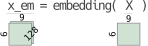

In [21]:
with tsensor.explain(fontname='Hack', dimfontname='Hack'):
    x_em = embedding(X)

In [22]:
X.shape

(6, 9)

In [23]:
x_em.shape

TensorShape([6, 9, 128])

## Averaging across tokens

![](images/Emb3.png)

![](images/Emb2.png)

In [ ]:
with tsensor.explain(fontname='Hack', dimfontname='Hack'):
    z = GlobalAveragePooling1D()(x_em)

In [ ]:
z.shape